In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# **Question 1**

In [3]:
#Loading of the numpy file and the images
img1 = cv.imread("img1.jpg",0)
img2 = cv.imread("img2.jpg",0)
I = [img1,img2]
a = np.load("GT2.npy")
len(I[0])

384

In [6]:
# function to calculate the partial derivatives
# values t can take are restricted to 0 and 1

def Ix(I,k,l,t):
  temp1 = I[t][k+1][l] + I[t][k+1][l+1] + I[t+1][k+1][l] + I[t+1][k+1][l+1]
  temp2 = I[t][k][l] + I[t][k][l+1] + I[t+1][k][l] + I[t+1][k][l+1]

  return 0.25*(temp1 - temp2)

def Iy(I,k,l,t):
  temp1 = I[t][k][l+1] + I[t][k+1][l+1] + I[t+1][k][l+1] + I[t+1][k+1][l+1]
  temp2 = I[t][k][l] + I[t][k+1][l] + I[t+1][k][l] + I[t+1][k+1][l]

  return 0.25*(temp1 - temp2)

def It(I,k,l,t):
  temp1 = I[t+1][k][l] + I[t+1][k][l+1] + I[t+1][k+1][l] + I[t+1][k+1][l+1]
  temp2 = I[t][k][l] + I[t][k][l+1] + I[t][k+1][l] + I[t][k+1][l+1]

  return 0.25*(temp1 - temp2)
  

In [7]:
# padding of the image
def padImage(img,size):
  w = size//2
  img = np.pad(img,((w,w),(w,w)), 'constant', constant_values = 0)
  return img

In [8]:
# Calculation of optical flow at a particular pixel location using window size s

def opflow(I,k,l,size):
  w = size//2
  t = 0
  A = []
  B = []
  # print(l-w)
  # print(l+w)
  for i in range(k-w,k+1+w):
    for j in range(l-w,l+1+w):
      A.append([Ix(I,i,j,t),Iy(I,i,j,t)])
      B.append(-It(I,i,j,t))
      # A.append([2,2])
      # B.append(2)

  u = np.linalg.lstsq(A,B,)
  u = u[0]
  temp = np.sqrt(u[0]**2 + u[1]**2)

  return temp



In [9]:
## Calculating the optical flow at every pixel

def compute_opflow(I,size):
  w = size//2
  u = []
  for i in range(w,len(I[0])-w-1):
    print("In the ",i,"th row")
    r = []
    # print(w)
    # print(len(I[0][0])-2*w)
    for j in range(w,len(I[0][0])-w-1):
      t = opflow(I,i,j,size)
      # t = 3
      r.append(t)
    u.append(r)

  return u


In [10]:
image = [padImage(I[0],3),padImage(I[1],3)]
image = np.array(image).astype('float64')
image.shape
final_image = compute_opflow(image,3)

In the  1 th row
In the  2 th row
In the  3 th row


<ipython-input-8-83509a21455d>:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  u = np.linalg.lstsq(A,B,)


In the  4 th row
In the  5 th row
In the  6 th row
In the  7 th row
In the  8 th row
In the  9 th row
In the  10 th row
In the  11 th row
In the  12 th row
In the  13 th row
In the  14 th row
In the  15 th row
In the  16 th row
In the  17 th row
In the  18 th row
In the  19 th row
In the  20 th row
In the  21 th row
In the  22 th row
In the  23 th row
In the  24 th row
In the  25 th row
In the  26 th row
In the  27 th row
In the  28 th row
In the  29 th row
In the  30 th row
In the  31 th row
In the  32 th row
In the  33 th row
In the  34 th row
In the  35 th row
In the  36 th row
In the  37 th row
In the  38 th row
In the  39 th row
In the  40 th row
In the  41 th row
In the  42 th row
In the  43 th row
In the  44 th row
In the  45 th row
In the  46 th row
In the  47 th row
In the  48 th row
In the  49 th row
In the  50 th row
In the  51 th row
In the  52 th row
In the  53 th row
In the  54 th row
In the  55 th row
In the  56 th row
In the  57 th row
In the  58 th row
In the  59 th ro

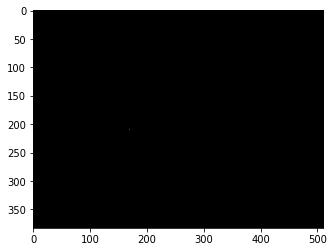

In [11]:
# img = [padImage(I[0],14),padImage(I[1],14)]
# u = PerformThreeStepSearch(img,7)
plt.imshow(final_image,cmap = 'gray')
plt.show()


In [12]:
def error(img1,img2):
  sum = 0
  l1 = len(img1)
  l2 = len(img1[0])
  for i in range(len(img1)):
    for j in range(len(img1[0])):
        sum += (img1[i][j]-img2[i][j])**2
        
  mse = sum/(l1*l2)
  return mse

In [13]:
final_img = np.array(final_image)
final_img.shape
a.shape
error(final_img,a)

2.9476777815029638e+29

# **Question 2**

**Exhaustive** **Search**

In [9]:
## function to calulate the cost function
## I[0] = reference frame
## I[1] = current frame
## k,l are the indexes for the current frame and m,n are the indexes for the reference frame

def MSE(k,l,m,n,I):
  s = 0
  # I = np.array(I).astype('float64')
  for i in range(16):
    for j in range(16):
      s += (I[1][k+i][l+j] - I[0][m+i][n+j]) ** 2
  return s/256


In [15]:
## function to find the matching block
## p is the search parameter defining the search window

def blockMatch(k,l,I,p):
  # I = np.array(I).astype('float64')
  min = MSE(k,l,k-p,l-p,I)
  xloc,yloc = k-p,l-p
  for i in range(-p,p):
    for j in range(-p,p):
      if MSE(k,l,k+i,l+j,I) < min:
        min = MSE(k,l,k+i,l+j,I)
        xloc = k+i
        yloc = l+j
  return xloc,yloc

In [16]:
# Performing the exhaustive search
# I is a padded image

def PerformExhaustiveSearch(I,p):
  # I = np.array(I).astype('float64')
  vf = len(I[0])-16-p
  hf = len(I[0][0])-16-p
  print(hf)
  u = np.zeros((len(I[0]),len(I[0][0])))
  for i in range(p,vf,16):
    print("In the ",i,"th row")
    for j in range(p,hf,16):
      xloc, yloc = blockMatch(i,j,I,p)
      for m in range(16):
        for n in range(16):
          u[i+m][j+n] = np.sqrt((xloc-i)**2 + (yloc-j)**2)

  return u


In [17]:
I = np.array(I).astype('float64')
img = [padImage(I[0],14),padImage(I[1],14)]
u = PerformExhaustiveSearch(img,7)

# plt.imshow(u,cmap = 'gray')

# plt.show()

503
In the  7 th row
In the  23 th row
In the  39 th row
In the  55 th row
In the  71 th row
In the  87 th row
In the  103 th row
In the  119 th row
In the  135 th row
In the  151 th row
In the  167 th row
In the  183 th row
In the  199 th row
In the  215 th row
In the  231 th row
In the  247 th row
In the  263 th row
In the  279 th row
In the  295 th row
In the  311 th row
In the  327 th row
In the  343 th row
In the  359 th row


In [18]:
error(a,u)

1014.8438576562863

**Three** **Step** **Search**

In [19]:
# function for block mathching using three step search
# s is the step size

def blockMatch2(k,l,I,p):
  I = np.array(I).astype('float64')
  s = 4
  while(s >= 1):
    min = MSE(k,l,k-p,l-p,I)
    for i in range(-p,p,s):
      for j in range(-p,p,s):
        if MSE(k,l,k+i,l+j,I) < min:
          min = MSE(k,l,k+i,l+j,I)
          k = k+i
          l = l+j
    s = s//2

  return k,l

In [20]:
# Performing the threes step search
# I is a padded image

def PerformThreeStepSearch(I,p):
  I = np.array(I).astype('float64')
  vf = len(I[0])-16-p
  hf = len(I[0][0])-16-p
  u = np.zeros((len(I[0]),len(I[0][0])))
  for i in range(p,vf,16):
    print("In the ",i,"th row")
    for j in range(p,hf,16):
      print("In the ",j,"th col")
      xloc, yloc = blockMatch2(i,j,I,p)
      print('xloc,yloc = ',xloc,yloc)
      for m in range(16):
        for n in range(16):
          u[i+m][j+n] = np.sqrt((xloc-i)**2 + (yloc-j)**2)

  return u

In [ ]:
I = np.array(I).astype('float64')
img = [padImage(I[0],14*4),padImage(I[1],14*4)]
u = PerformThreeStepSearch(img,7)

In [26]:
error(a,u)

3602.9871656836326

**Diamond** **Search**

In [4]:
def locations(kref,lref,s):
  locations = [(kref,lref)]
  for i in range(kref-s,kref+s+1):
    for j in range(lref-s,lref+s+1):
      if (abs(kref-i) + abs(lref-j)) == s:
        locations.append((i,j))
  return locations

In [5]:
def DiamondSearchSDSP(k,l,x0,y0,I):
  # I = np.array(I).astype('float64')
  s = 1
  locs = locations(x0,y0,s)
  min = MSE(k,l,x0,y0,I)
  xmin,ymin = x0,y0
  for loc in locs:
    if MSE(k,l,loc[0],loc[1],I) < min:
      min = MSE(k,l,loc[0],loc[1],I)
      xmin,ymin = loc

  return xmin,ymin



In [6]:

def DiamondSearchLDSP(k,l,I):
  # I = np.array(I).astype('float64')
  s = 2
  x0,y0 = k,l
  xmin,ymin = k+8,l+8
  count = 1
  while((xmin,ymin) != (x0,y0)):
    x0,y0 = xmin,ymin
    locs = locations(x0,y0,s)
    min = MSE(k,l,xmin,ymin,I)
    for loc in locs:
      if MSE(k,l,loc[0],loc[1],I) < min:
        min = MSE(k,l,loc[0],loc[1],I)
        xmin,ymin = loc


  x0,y0 = xmin,ymin
  xloc,yloc = DiamondSearchSDSP(k,l,x0,y0,I)
  return xloc,yloc



In [17]:
def DiamondSearch(I):
  u = np.zeros((len(I[0]),len(I[0][0])))
  for i in range(len(I)):
    for j in range(len(I[0])):
      t1,t2 = DiamondSearchLDSP(i,j,I)
      u[i:i+16,j:j+16] = np.sqrt((t1-i)**2 + (t2-j)**2)

  return u



In [18]:
I = np.array(I).astype('float64')
u = DiamondSearch(I)


In [21]:
error(a,u)

1238.6358019564439